# Product Ratings

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Read CSV in pandas
data = ("/Users/chac/Desktop/Class/Project_4/amazon_product_reviews_ML/Resources/cleaned_data.csv")
df = pd.read_csv(data)

# Display DataFrame
df.head()

,Unnamed: 0,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery
0,0,B0D12T4WZT,USB C Charger for iPhone 14 13 12 11 Charger [...,9,USD,5.0,59,1,$9.99,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
1,1,B0D2X7Y7VF,USB C to Lightning Cable [Apple MFi Certified]...,7,USD,4.5,318,1,$7.49,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
2,2,B0CZPHPJLN,Beats Solo 4 - Wireless Bluetooth On-Ear Headp...,149,USD,4.1,92,1,$149.95,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 Or fastest delivery ..."
3,3,B0D49CWPH2,"USB C to USB C Cable, (5Pack 6FT), New Nylon U...",29,USD,4.9,94,1,$29.66,False,False,True,False,10K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
4,4,B0D14HHDGJ,iPhone 15 Charger 5Pack (6/6/6/6/6 ft) USB C t...,15,USD,4.8,80,1,$15.99,False,False,True,False,500+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."


In [11]:
# Determine column names
df.columns

Index(['Unnamed: 0', 'asin', 'product_title', 'product_price', 'currency',
       'product_star_rating', 'product_num_ratings', 'product_num_offers',
       'product_minimum_offer_price', 'is_best_seller', 'is_amazon_choice',
       'is_prime', 'climate_pledge_friendly', 'sales_volume', 'delivery'],
      dtype='object')

Now that we have a clearer view of the DataFrame columns, we can make informed decisions about which columns will be utilized for the remainder of the code.

In [12]:
# Sort the data by 'product_star_rating' and 'product_num_ratings' in descending order
df_sorted = df.sort_values(by = ["product_star_rating", "product_num_ratings"], ascending = [False, False])

# Display results
df_sorted.head()

,Unnamed: 0,asin,product_title,product_price,currency,product_star_rating,product_num_ratings,product_num_offers,product_minimum_offer_price,is_best_seller,is_amazon_choice,is_prime,climate_pledge_friendly,sales_volume,delivery
0,0,B0D12T4WZT,USB C Charger for iPhone 14 13 12 11 Charger [...,9,USD,5.0,59,1,$9.99,False,False,True,False,4K+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
42,42,B0D1Y63X72,WONGKUO Night Vision Goggles - 5W Upgraded HD ...,69,USD,5.0,23,1,$69.99,False,False,True,False,50+ bought in past month,"FREE delivery Tue, Jun 11 Or fastest delivery ..."
66,66,B0CYH9CP72,2024 Upgraded Ultrasonic Pest Repeller 6 Packs...,29,USD,5.0,18,1,$29.99,False,False,True,False,100+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
273,273,B0C58KJC8C,DDgro Electronics Organizer for Woman Travel S...,9,USD,5.0,16,1,$9.99,False,False,True,False,100+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."
288,288,B0C58KJC8C,DDgro Electronics Organizer for Woman Travel S...,9,USD,5.0,16,1,$9.99,False,False,True,False,100+ bought in past month,"FREE delivery Tue, Jun 11 on $35 of items ship..."


By sorting the DataFrame in descending order by product_star_rating and product_num_ratings, we can visually assess the correlation between these two variables.

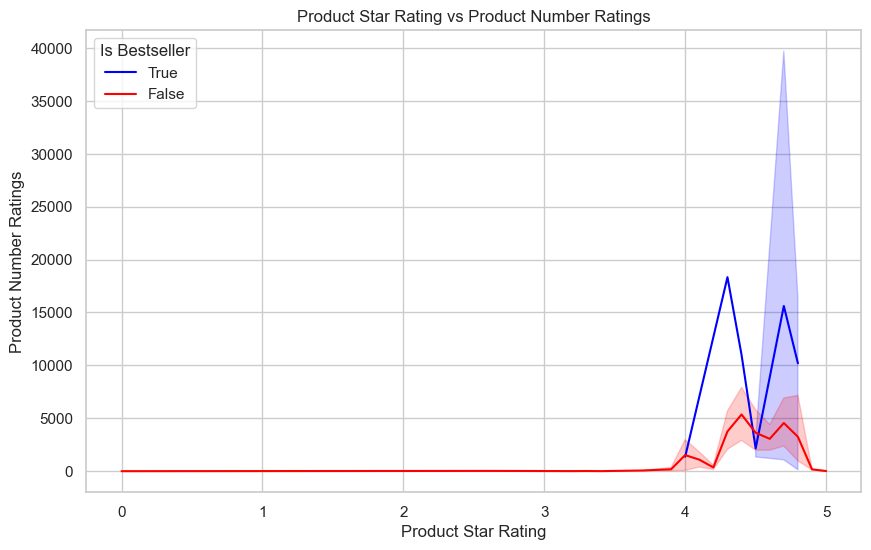

In [13]:
# Plot using Seaborn 
sns.set(style = "whitegrid")
plt.figure(figsize = (10, 6))

# Plot for is_bestseller=True
sns.lineplot(data = df_sorted[df_sorted["is_best_seller"] == True], x = "product_star_rating", y = "product_num_ratings", color = "blue", label = "True")

# Plot for is_bestseller=False
sns.lineplot(data = df_sorted[df_sorted["is_best_seller"] == False], x = "product_star_rating", y = "product_num_ratings", color = "red", label = "False")

plt.title("Product Star Rating vs Product Number Ratings")
plt.xlabel("Product Star Rating")
plt.ylabel("Product Number Ratings")
plt.legend(title="Is Bestseller")

# Define the file path to save the visualization
plt.savefig("Visualizations/Product Star Rating vs Product Number Ratings.png")

# Display the plot
plt.show()

After analyzing the Product Star Rating versus Product Number of Ratings, it is apparent that bestselling items tend to receive a higher quantity of ratings without necessarily reaching a 5-star rating. Conversely, non-bestselling items typically accumulate around 5000 ratings and maintain a similar maximum star rating.

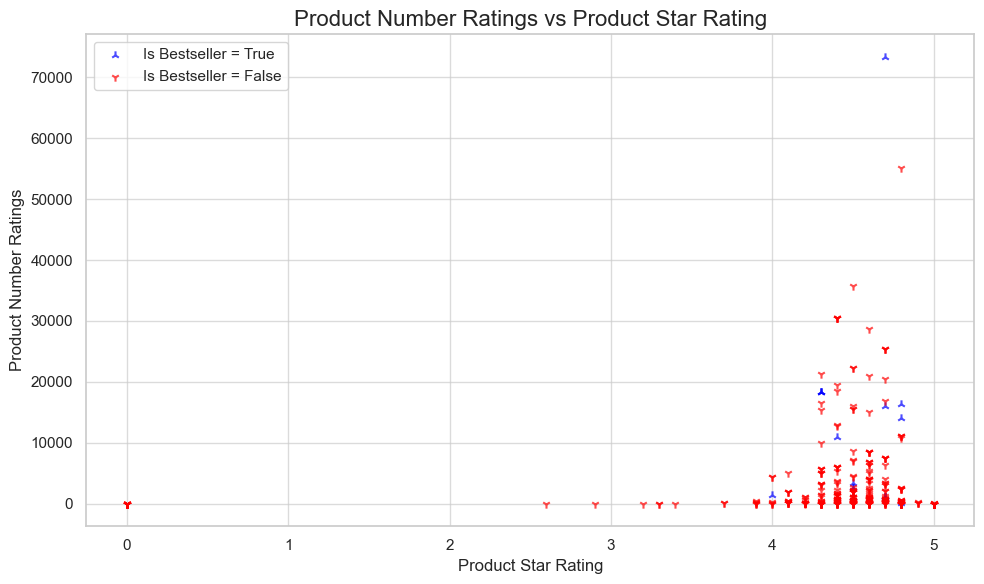

In [14]:
# Plot using Matplotlib
plt.figure(figsize = (10, 6))

# Scatter plot for bestsellers
plt.scatter(df_sorted[df_sorted["is_best_seller"] == True]["product_star_rating"],
            df_sorted[df_sorted["is_best_seller"] == True]["product_num_ratings"],
            color="blue", label="Is Bestseller = True", alpha = 0.7, marker = "2")

# Scatter plot for non-bestsellers
plt.scatter(df_sorted[df_sorted["is_best_seller"] == False]["product_star_rating"],
            df_sorted[df_sorted["is_best_seller"] == False]["product_num_ratings"],
            color="red", label="Is Bestseller = False", alpha = 0.7, marker = "1")

plt.title("Product Number Ratings vs Product Star Rating", fontsize = 16)
plt.xlabel("Product Star Rating", fontsize = 12)
plt.ylabel("Product Number Ratings", fontsize = 12)
plt.legend()
plt.grid(True, alpha = 0.7)
plt.tight_layout()

# Define the file path to save the visualization
plt.savefig("Visualizations/Product Star Rating vs Product Number Ratings2.png")

# Display the plot
plt.show()

Upon analyzing the Product Number Ratings versus Product Star Rating using an alternative visualization, it becomes evident that there is a significantly higher engagement in rating non-bestselling items compared to bestselling ones.

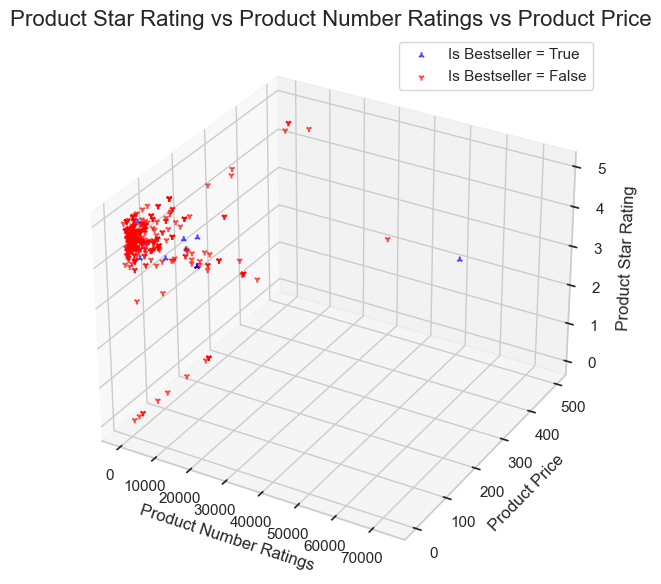

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Plot using Matplotlib
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Data Masks
is_bestseller = df_sorted["is_best_seller"]
bestseller_mask = is_bestseller == True
non_bestseller_mask = is_bestseller == False

# Scatter plot for bestsellers
ax.scatter(df_sorted[bestseller_mask]["product_num_ratings"],
           df_sorted[bestseller_mask]["product_price"],
           df_sorted[bestseller_mask]["product_star_rating"],
           color="blue", label="Is Bestseller = True", alpha=0.7, marker="2")

# Scatter plot for non-bestsellers
ax.scatter(df_sorted[non_bestseller_mask]["product_num_ratings"],
           df_sorted[non_bestseller_mask]["product_price"],
           df_sorted[non_bestseller_mask]["product_star_rating"],
           color="red", label="Is Bestseller = False", alpha=0.7, marker="1")

ax.set_title("Product Star Rating vs Product Number Ratings vs Product Price", fontsize=16)
ax.set_xlabel("Product Number Ratings", fontsize=12)
ax.set_ylabel("Product Price", fontsize=12)
ax.set_zlabel("Product Star Rating", fontsize=12)
ax.legend()
ax.grid(True, alpha=0.7)
plt.tight_layout()

# Define the file path to save the visualization
plt.savefig("Visualizations/Product Star Rating vs Product Number Ratings vs Product Price.png")

# Display the plot
plt.show()

Upon examining the Product Star Rating vs Product Number Ratings vs Product Price visualization, we observe a correlation between product price and star rating, wherein lower-priced items tend to receive a higher proportion of high ratings. Furthermore, our analysis reveals that the distribution of product ratings is characterized by a consistent pattern, with the majority of products receiving fewer than 10,000 ratings, while a select few exhibit a significant increase in ratings, peaking at over 70,000. Notably, the review frequency of bestselling items lags behind that of non bestselling items, indicating a disparity in customer engagement between these two product categories.

In [16]:
# Determine the item with the highest number of ratings and the lowest number of ratings
# Find the most rated product
most_rated_product = df_sorted.loc[df_sorted["product_num_ratings"].idxmax()]

# Find the least rated product
least_rated_product = df_sorted.loc[df_sorted["product_num_ratings"].idxmin()]

# Output the results
print("Most Rated Product:")
print(f"Title: {most_rated_product['product_title']}")
print(f"Number of Ratings: {most_rated_product['product_num_ratings']}")
print(f"Star Rating: {most_rated_product['product_star_rating']}")
print(f"Is Bestseller: {most_rated_product['is_best_seller']}")
print("\nLeast Rated Product:")
print(f"Title: {least_rated_product['product_title']}")
print(f"Number of Ratings: {least_rated_product['product_num_ratings']}")
print(f"Star Rating: {least_rated_product['product_star_rating']}")
print(f"Is Bestseller: {least_rated_product['is_best_seller']}")



Most Rated Product:
Title: Meta Quest 2 — Advanced All-In-One Virtual Reality Headset — 128 GB
Number of Ratings: 73340
Star Rating: 4.7
Is Bestseller: True

Least Rated Product:
Title: National Geographic: Panda - Nintendo DS (Renewed)
Number of Ratings: 0
Star Rating: 0.0
Is Bestseller: False


The Meta Quest 2 VR headset is the most rated product with 73,340 ratings and a high star rating of 4.7, indicating strong customer satisfaction and bestseller status. In contrast, the National Geographic: Panda game for Nintendo DS has zero ratings and a 0.0 star rating, reflecting a lack of consumer engagement and interest. This highlights the critical role of customer reviews in influencing product visibility and market success.

# Analysis
Product Star Rating vs. Product Number of Ratings:
Bestselling items tend to accumulate a higher quantity of ratings without necessarily reaching a 5-star rating. Non-bestselling items typically gather around 5000 ratings with a similar maximum star rating. This suggests that customer engagement might not solely depend on achieving a perfect rating for bestselling items.

Product Number of Ratings vs. Product Star Rating (Alternative Visualization):
There's significantly higher engagement in rating non-bestselling items compared to bestselling ones. This indicates that customers might be more inclined to rate products that are not bestsellers.

Product Star Rating vs. Product Number Ratings vs. Product Price:
Lower-priced items tend to receive a higher proportion of high ratings, suggesting that customers might have higher expectations for more expensive products. The majority of products receive fewer than 10,000 ratings, but there are some outliers with significantly higher ratings, especially among non-bestselling items. Bestselling items show a lower frequency of reviews compared to non-bestselling items, indicating differences in customer engagement.

Most Rated and Least Rated Products:
The Meta Quest 2 VR headset stands out as the most rated product with 73,340 ratings and a high star rating of 4.7, indicating strong customer satisfaction and its bestseller status. On the other hand, the National Geographic: Panda game for Nintendo DS has zero ratings and a 0.0 star rating, reflecting a lack of consumer engagement and interest. This highlights the crucial role of customer reviews in influencing product visibility and market success.